<a href="https://colab.research.google.com/github/weibb123/Tensorflow_Tutorial/blob/main/TF(CNN_tutorial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network with Tensorflow

We will be explore how to do image classification using convolutional neural network 

In [1]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-05-14 04:20:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.65.80, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   224MB/s    in 0.5s    

2022-05-14 04:20:13 (224 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import zipfile


# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
# Get the class names (this is helpful with a longer list of classes)

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class
print(class_names)

['pizza' 'steak']


In [4]:
import os

# Explore through the directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


Image shape: (512, 512, 3)


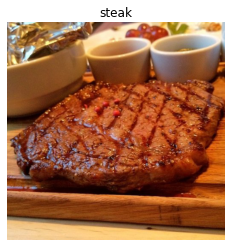

In [5]:
# need matplotlib to view images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f'Image shape: {img.shape}') #show the shape of the image

  return img

# View a random image from the training dataset
img = view_random_img(target_dir="pizza_steak/train/", target_class="steak")

In [6]:
# View the img (it is just a array/tensor)
img

array([[[143, 142, 158],
        [160, 156, 170],
        [178, 168, 176],
        ...,
        [185, 199, 208],
        [182, 200, 210],
        [186, 206, 217]],

       [[147, 146, 160],
        [165, 163, 174],
        [183, 177, 181],
        ...,
        [184, 198, 207],
        [182, 200, 212],
        [185, 205, 216]],

       [[148, 152, 163],
        [170, 171, 176],
        [190, 186, 185],
        ...,
        [184, 198, 209],
        [182, 200, 212],
        [184, 203, 217]],

       ...,

       [[243, 211, 170],
        [243, 211, 170],
        [242, 210, 169],
        ...,
        [252, 198,  98],
        [253, 199,  99],
        [254, 200, 100]],

       [[244, 212, 173],
        [244, 212, 171],
        [243, 211, 170],
        ...,
        [248, 193,  93],
        [248, 193,  93],
        [248, 193,  93]],

       [[244, 212, 173],
        [244, 212, 173],
        [242, 210, 169],
        ...,
        [255, 197,  98],
        [255, 198,  99],
        [255, 199, 100]]

In [7]:
# view the image shape
img.shape

(512, 512, 3)

Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(or call normalize) their pixel values by dividing the image arrays by 255.

In [8]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.56078431, 0.55686275, 0.61960784],
        [0.62745098, 0.61176471, 0.66666667],
        [0.69803922, 0.65882353, 0.69019608],
        ...,
        [0.7254902 , 0.78039216, 0.81568627],
        [0.71372549, 0.78431373, 0.82352941],
        [0.72941176, 0.80784314, 0.85098039]],

       [[0.57647059, 0.57254902, 0.62745098],
        [0.64705882, 0.63921569, 0.68235294],
        [0.71764706, 0.69411765, 0.70980392],
        ...,
        [0.72156863, 0.77647059, 0.81176471],
        [0.71372549, 0.78431373, 0.83137255],
        [0.7254902 , 0.80392157, 0.84705882]],

       [[0.58039216, 0.59607843, 0.63921569],
        [0.66666667, 0.67058824, 0.69019608],
        [0.74509804, 0.72941176, 0.7254902 ],
        ...,
        [0.72156863, 0.77647059, 0.81960784],
        [0.71372549, 0.78431373, 0.83137255],
        [0.72156863, 0.79607843, 0.85098039]],

       ...,

       [[0.95294118, 0.82745098, 0.66666667],
        [0.95294118, 0.82745098, 0.66666667],
        [0.94901961, 0

## Typical architecture of convolutional neural network

CNN are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. Below are the components of traditional CNN.\

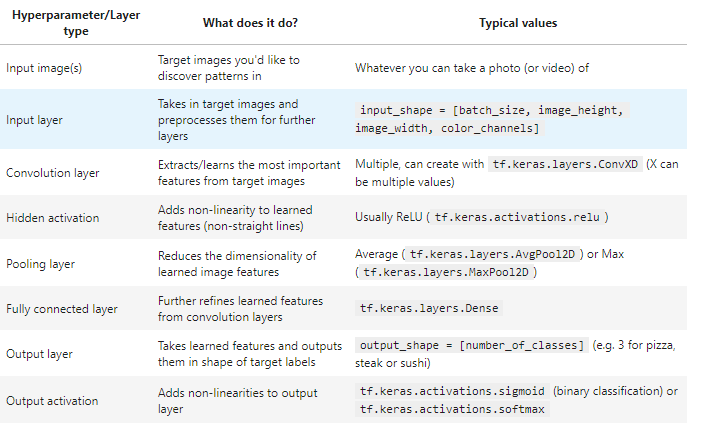

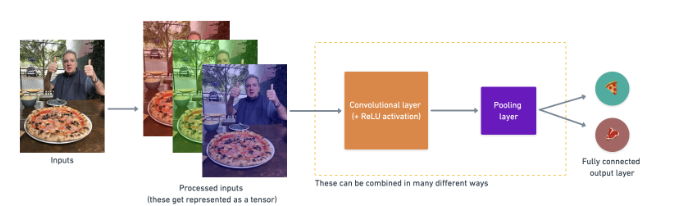

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 1 and 0)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup the train/test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size = (224,224), # convert all images to 224 pixels
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size = (224,224), # convert all images to 224 pixels
                                               class_mode='binary',
                                               seed=42)

# Create a CNN model (Will use Tiny VGG --- https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3, # can also be (3,3)
                                                             activation='relu',
                                                             input_shape=(224, 224, 3)), # first layer needs specifies input shape
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid') # binary activation output

])

#Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 21s 204ms/step - loss: 0.5481 - accuracy: 0.7407 - val_loss: 0.4052 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4188 - accuracy: 0.8153 - val_loss: 0.3436 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3736 - accuracy: 0.8433 - val_loss: 0.3159 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3463 - accuracy: 0.8553 - val_loss: 0.3131 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3345 - accuracy: 0.8613 - val_loss: 0.2756 - val_accuracy: 0.8860


In [10]:
# check out summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better, well sometimes. Convolutional neural network seeks to sort out and learn the most important patterns in an image.  So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

# Implement Data augmentation

Data augmentation -> process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [29]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=90, # rotate the image slightly
                                             shear_range=0.2, #zoom into the image
                                             width_shift_range=0.2, #shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # dont shuffle for demonstration purposes, shuffle is good
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [30]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

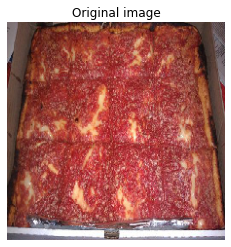

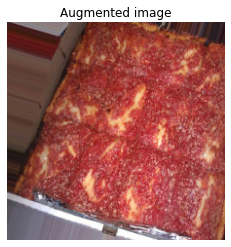

In [31]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Data augmentation is a way to try and prevent a model overfitting. If your model is overfitting(test loss keeps increasing), you may want to try using data augmentation.


In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
# Create the model (same as model_2)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 475ms/step - loss: 0.6974 - accuracy: 0.5180 - val_loss: 0.6855 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6888 - accuracy: 0.5373 - val_loss: 0.6549 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6470 - accuracy: 0.6620 - val_loss: 0.5608 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6574 - accuracy: 0.6400 - val_loss: 0.5897 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6515 - accuracy: 0.6440 - val_loss: 0.5359 - val_accuracy: 0.8060


Why didn't our model get very good results after data augmented?\
Because we turn data shuffling to <b>false</b>!


In [36]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [37]:
# Create the model (same as model_2)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 493ms/step - loss: 0.6491 - accuracy: 0.6233 - val_loss: 0.5367 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5172 - accuracy: 0.7473 - val_loss: 0.3680 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4634 - accuracy: 0.7860 - val_loss: 0.5988 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4799 - accuracy: 0.7700 - val_loss: 0.3248 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 27s 566ms/step - loss: 0.4523 - accuracy: 0.7980 - val_loss: 0.3137 - val_accuracy: 0.8740


In [38]:
# function for plotting loss and accuracy curves

def plot_loss_curves(history):
  """
  return separate loss curves for training and testing metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

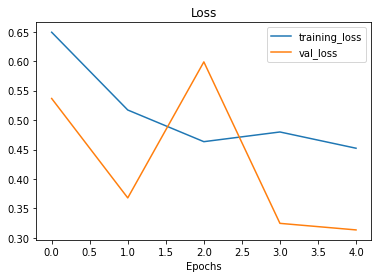

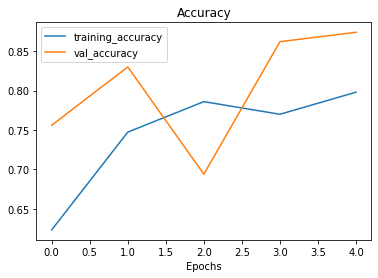

In [39]:
# Check model's performance history training on augmented data
plot_loss_curves(history_3)

# How to improve further?



*   Add more Convolutional layers (more complexity)
*   Add more filters in each convo layer(10 to 32, 64, 128)
*   Train for longer(more epochs)
*   Finding an ideal learning rate
*   Get more data(model can learn more)
*   Use transfer learning to apply another CNN model







In [40]:
# check model_3 architecture
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

#Making prediction with our trained model


In [41]:
# classes we're working with
print(class_names)

['pizza' 'steak']


--2022-05-14 05:33:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-05-14 05:33:18 (192 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



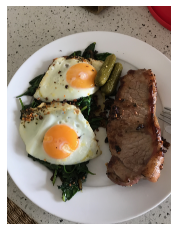

In [42]:
# view our example iamge
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [43]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

We need to reshape this image since our model only accept 224 pixels

In [44]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [45]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Remember how our model was trained in batches?

The batch size become the first dimension.

So our model was trained on data in the shape of (batch_size, 224, 224, 3)

We can add an extra to our custom image tensor using <b>tf.expand_dims </b>

In [46]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [48]:
# Make a prediction on custom image tensor
pred = model_3.predict(steak)
pred

array([[0.8056615]], dtype=float32)

The predictions come out in prediction probability form. This means how likely the image is to be one class or another!

In [49]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [50]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [51]:
def pred_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a model and plots the image
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class =class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predcited class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  

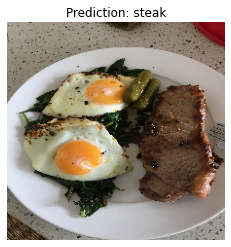

In [52]:
# Test our model
pred_plot(model_3, '03-steak.jpeg', class_names)

--2022-05-14 05:39:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-05-14 05:39:42 (237 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



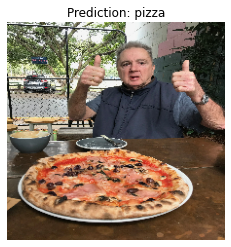

In [54]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_plot(model_3, "03-pizza-dad.jpeg", class_names)